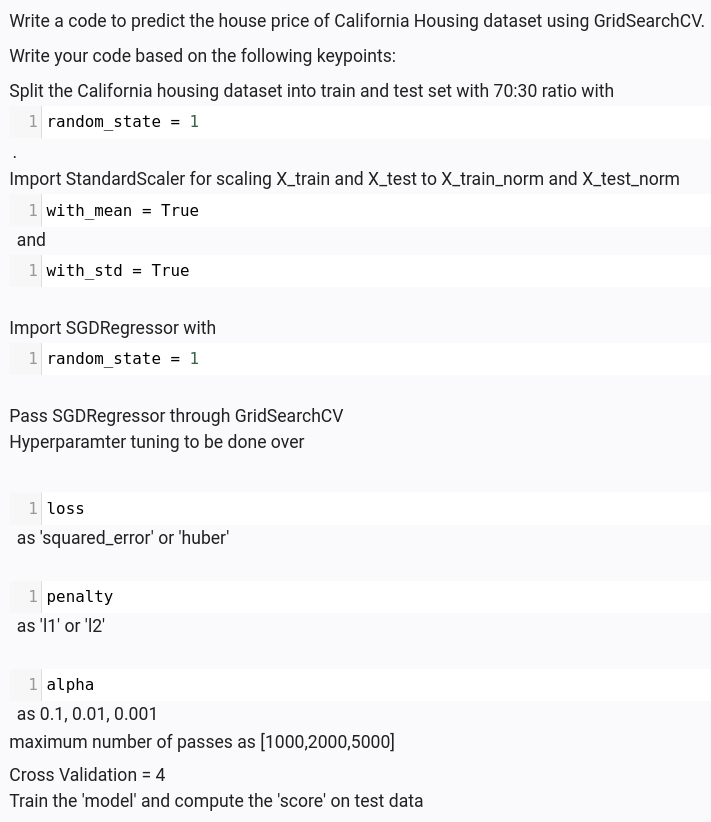

In [35]:
import pandas as pd

In [36]:
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True , as_frame=True)

In [37]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=1 , test_size=0.3)

In [39]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5748,2.9148,15.0,4.285957,1.105532,3164.0,2.692766,34.16,-118.27
5592,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26
2110,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75
13901,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56
18425,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [41]:
X_train_norm

array([[-0.50715954, -1.07853296, -0.44712678, ..., -0.03473461,
        -0.68811806,  0.64821297],
       [-0.36780162,  0.98848922, -0.40478899, ...,  0.04136812,
        -0.85669979,  0.6531961 ],
       [-0.72098999,  1.62449604, -0.21327712, ..., -0.03379571,
         0.52473385, -0.08929041],
       ...,
       [-1.45114921,  1.06799007, -0.2117232 , ..., -0.03858451,
        -0.79582306,  0.6531961 ],
       [-0.65684615, -1.47603722, -0.17247966, ..., -0.02821367,
        -0.88947957,  1.2013405 ],
       [-0.83089789,  0.5114841 , -0.31691522, ..., -0.04325394,
         1.01174774, -1.31015748]])

In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["huber" , "squared_error"],
    "penalty" : ["l1" , "l2"],
    "alpha" : [0.1,0.01,0.001],
    "max_iter" : [1000,2000,5000]
}
SGD = SGDRegressor(random_state=1)
sgd = GridSearchCV(SGD , params , cv=4)
sgd.fit(X_train_norm , y_train)

GridSearchCV(cv=4, estimator=SGDRegressor(random_state=1),
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'loss': ['huber', 'squared_error'],
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['l1', 'l2']})

In [45]:
sgd.best_params_

{'alpha': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}

In [43]:
sgd.best_estimator_

SGDRegressor(alpha=0.01, penalty='l1', random_state=1)

#### Q1) Enter the value of the 'score'.(Enter your answer in four decimal places)


In [44]:
sgd.best_estimator_.score(X_test_norm , y_test)

0.6187330221933766

#### Q2) Enter the value of the best alpha obtained.

In [22]:
sgd.best_estimator_.alpha

0.01

#### Q3) Enter the value of the best maximum number of passes obtained.

In [23]:
sgd.best_estimator_.max_iter

1000

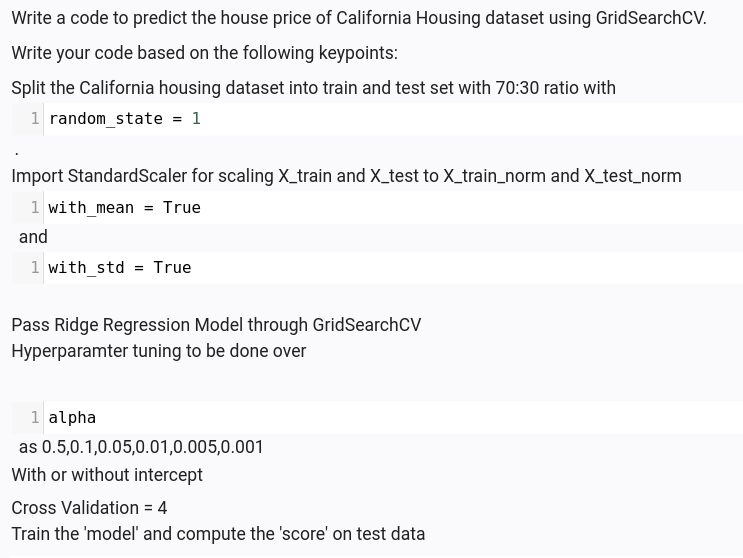

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {
    "alpha" : [0.5,0.1,0.05,0.01,0.005,0.001],
    "fit_intercept" : [False , True]
}
ridge = GridSearchCV(Ridge() , params , cv=4)
ridge.fit(X_train_norm , y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [False, True]})

In [25]:
ridge.best_estimator_

Ridge(alpha=0.5)

#### Q4) Enter the value of the 'score'. (Enter your answer in four decimal places)

In [26]:
ridge.best_estimator_.score(X_test_norm , y_test)

0.6070536948952383

#### Q5) Enter the value of the best alpha obtained.


In [27]:
ridge.best_estimator_.alpha

0.5

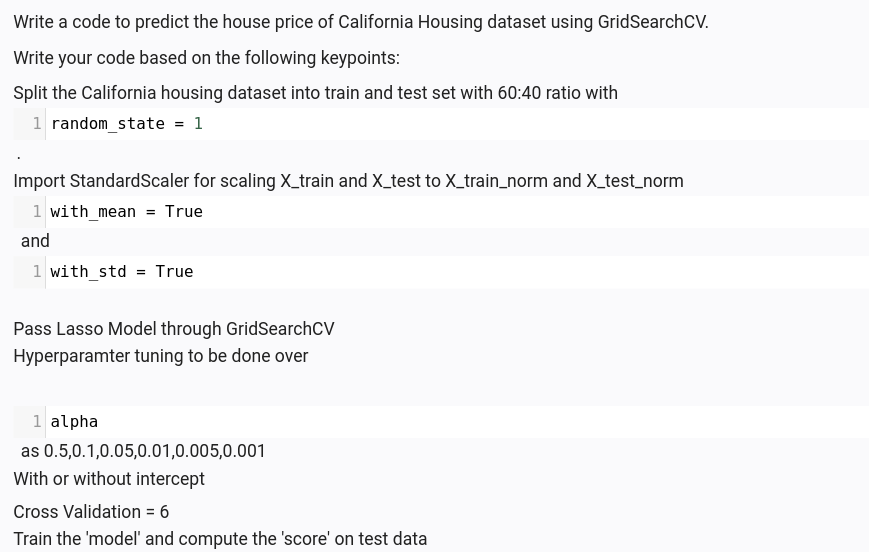

In [28]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.4 , random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params = {
    "alpha" : [0.5,0.1,0.05,0.01,0.005,0.001],
    "fit_intercept" : [True , False]
}
lasso = GridSearchCV(Lasso() , params , cv=6 )
lasso.fit(X_train_norm , y_train)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]})

In [31]:
lasso.best_estimator_

Lasso(alpha=0.005)

#### Q6) Which of the following is the 'score' computed by your code?

In [32]:
lasso.best_estimator_.score(X_test_norm , y_test)

0.6131474493316342

#### Q7) Enter the value of the best alpha obtained.

In [33]:
lasso.best_estimator_.alpha

0.005